In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib tk


In [2]:
class Cursor:
    def __init__(self, ax):
        self.ax = ax

        self.lx = ax.axhline(color='k', alpha=0.2)  # the horiz line
        self.ly = ax.axvline(color='k', alpha=0.2)  # the vert line

        self.clicks = []
        self.scatter_clicks, = ax.plot([], [], linestyle="none", marker="o", color="r")

        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata

        # update the line positions and the text
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)
        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))

        self.ax.figure.canvas.draw()

    def mouse_click(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        self.clicks.append((x, y))

        # update the scatter
        if len(self.clicks)>=1:
            xs, ys = zip(*self.clicks)
            self.scatter_clicks.set_data(xs, ys)

        self.ax.figure.canvas.draw()


In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

cursor = Cursor(ax)
fig.canvas.mpl_connect('motion_notify_event', cursor.mouse_move)
fig.canvas.mpl_connect('button_press_event', cursor.mouse_click)
plt.show()

In [4]:
cursor.clicks

[(-0.217741935483871, 0.4404761904761909),
 (-0.2338709677419355, 0.47835497835497875),
 (-0.2056451612903225, 0.5649350649350653),
 (-0.2056451612903225, 0.6244588744588748),
 (-0.1693548387096775, 0.6515151515151518),
 (-0.125, 0.6731601731601735),
 (-0.0766129032258065, 0.6785714285714288),
 (-0.020161290322580516, 0.6623376623376627),
 (0.056451612903225756, 0.6515151515151518),
 (0.1088709677419355, 0.6028138528138531),
 (0.1693548387096775, 0.55952380952381),
 (0.20967741935483875, 0.4675324675324679),
 (0.2016129032258065, 0.42424242424242453),
 (0.14516129032258074, 0.29978354978355015),
 (0.05241935483870974, 0.18073593073593108),
 (-0.012096774193548265, 0.07251082251082286),
 (-0.04435483870967749, 0.012987012987013324),
 (-0.10080645161290325, -0.0952380952380949),
 (-0.14516129032258052, -0.18181818181818166),
 (-0.1693548387096775, -0.28463203463203435),
 (-0.1733870967741935, -0.3441558441558439),
 (-0.16129032258064524, -0.4686147186147184),
 (-0.13306451612903225, -0.5

In [5]:
%matplotlib inline

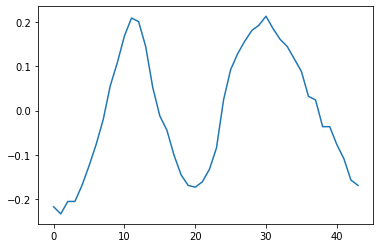

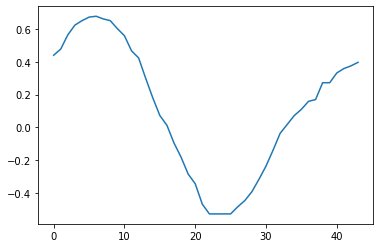

In [6]:
xs, ys = zip(*cursor.clicks)
plt.plot(xs)
plt.show()
plt.plot(ys)
plt.show()

In [7]:
import numpy as np

In [8]:
np.linspace(-1, 1, 128)

array([-1.        , -0.98425197, -0.96850394, -0.95275591, -0.93700787,
       -0.92125984, -0.90551181, -0.88976378, -0.87401575, -0.85826772,
       -0.84251969, -0.82677165, -0.81102362, -0.79527559, -0.77952756,
       -0.76377953, -0.7480315 , -0.73228346, -0.71653543, -0.7007874 ,
       -0.68503937, -0.66929134, -0.65354331, -0.63779528, -0.62204724,
       -0.60629921, -0.59055118, -0.57480315, -0.55905512, -0.54330709,
       -0.52755906, -0.51181102, -0.49606299, -0.48031496, -0.46456693,
       -0.4488189 , -0.43307087, -0.41732283, -0.4015748 , -0.38582677,
       -0.37007874, -0.35433071, -0.33858268, -0.32283465, -0.30708661,
       -0.29133858, -0.27559055, -0.25984252, -0.24409449, -0.22834646,
       -0.21259843, -0.19685039, -0.18110236, -0.16535433, -0.1496063 ,
       -0.13385827, -0.11811024, -0.1023622 , -0.08661417, -0.07086614,
       -0.05511811, -0.03937008, -0.02362205, -0.00787402,  0.00787402,
        0.02362205,  0.03937008,  0.05511811,  0.07086614,  0.08

In [9]:
np.searchsorted(np.linspace(-1, 1, 128), -0.5)

32

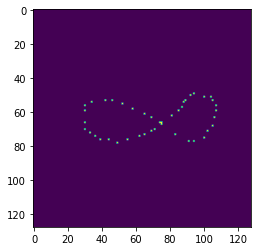

In [12]:
canvas = np.zeros((128, 128))
for i in range(len(xs)):
    x_idx = np.searchsorted(np.linspace(-1, 1, 128), xs[i])
    y_idx = np.searchsorted(np.linspace(-1, 1, 128), ys[i])
    canvas[x_idx, y_idx]=1
plt.imshow(canvas)
plt.show()

In [14]:
from scipy import signal

In [17]:
xs2 = signal.resample(xs, 1000)
ys2 = signal.resample(ys, 1000)

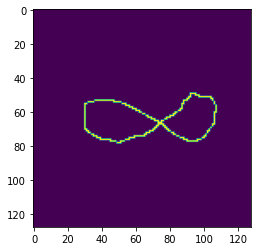

In [18]:
canvas = np.zeros((128, 128))
for i in range(len(xs2)):
    x_idx = np.searchsorted(np.linspace(-1, 1, 128), xs2[i])
    y_idx = np.searchsorted(np.linspace(-1, 1, 128), ys2[i])
    canvas[x_idx, y_idx]=1
plt.imshow(canvas)
plt.show()

In [19]:
np.save("8x.npy", xs)

In [20]:
np.save("8y.npy", ys)